## 建模

\begin{equation}
\begin{aligned}
\text{min} \ & ||\mathbf{w}|| \\
s.t. \ &  y^i(\mathbf{w}^T\mathbf{x}^i+b) \ge 1 \ (\text{for any} \ i=1,...,n)
\end{aligned}
\end{equation}

至此，问题转化为**不等式约束优化问题**。

我们可以利用[在线工具](http://apmonitor.com/online/view_pass.php?f=hs071.apm)求解以验证我们的想法是否正确。我们继续使用感知器算法里的数据，求得$w_1=0.160583898425$,$w_2=0.145985394716$,$b=-2.44525504112$。超平面如下所示：


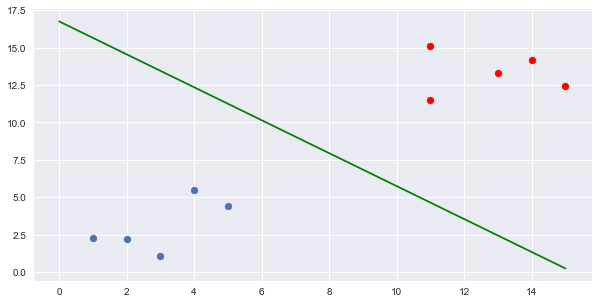

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

X=np.array([[3.,1.1],
              [2.,2.2],
              [1.,2.3],
              [5.,4.4],
              [4.,5.5],
              [11.,11.5],
              [15.,12.4],
              [13.,13.3],
              [14.,14.2],
              [11.,15.1]])
y=np.array([-1.,-1.,-1.,-1.,-1.,1.,1.,1.,1.,1.])

plt.figure(figsize=(10,5))
plt.scatter(X[y==-1,0],X[y==-1,1])
plt.scatter(X[y==1,0],X[y==1,1],color='r')


w1=0.160583898425
w2=0.145985394716
b=-2.44525504112

x=np.arange(16)
y=-w1/w2*x-b/w2
plt.plot(x,y,color='g')
plt.show()

## 求解

### 拉格朗日乘子法

$$
L(\mathbf{w},b,\mathbf{\lambda})=||\mathbf{w}||+\sum^{n}_{i=1}\lambda_i(y^i(\mathbf{w}^T\mathbf{x}^i+b)-1)
$$

\begin{equation}
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial w_1}=2w_1+\sum^{n}_{i=1}\lambda_iy^ix_1=0 \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial w_2}=2w_2+\sum^{n}_{i=1}\lambda_iy^ix_2=0 \\
\vdots \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial w_m}=2w_m+\sum^{n}_{i=1}\lambda_iy^ix_m=0 \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial b}=\sum^{n}_{i=1}\lambda_iy^i=0 \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial \lambda_1}=y^1(\mathbf{w}^T\mathbf{x}^1+b)-1=0 \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial \lambda_2}=y^2(\mathbf{w}^T\mathbf{x}^2+b)-1=0 \\
\vdots \\
\frac{\partial L(\mathbf{w},b,\mathbf{\lambda})}{\partial \lambda_n}=y^n(\mathbf{w}^T\mathbf{x}^n+b)-1=0 \\
\end{equation}

\begin{equation}
\begin{aligned}
2w_1+0w_2+0b-\lambda_1-2\lambda_2-3\lambda_3+7\lambda_4+8\lambda_5+9\lambda_6+10\lambda_7 & =0 \\
0w_1+2w_2+0b-\lambda_1-2\lambda_2-\lambda_3+7\lambda_4+8\lambda_5+6\lambda_6+7.5\lambda_7 & =0 \\
-\lambda_1-\lambda_2-\lambda_3+\lambda_4+\lambda_5+\lambda_6+\lambda_7 & =0 \\
-w_1-w_2-b & =1 \\
-2w_1-2w_2-b & =1 \\
-3w_1-w_2-b & =1 \\
7w_1+7w_2+b & =1 \\ 
8w_1+8w_2+b & =1 \\
9w_1+6w_2+b & =1 \\
10w_1+7.5w_2+b & =1 \\
\end{aligned} \\
\end{equation}

标准形式：
\begin{equation}
\begin{aligned}
\text{min} \ & f(\mathbf{x}) \\
s.t.\  & g_i(\mathbf{x}) \le 0 \ (\text{for any} \ i=1,...,p) \\
& h_j(\mathbf{x}) = 0 \ (\text{for any} \ j=1,...,q)
\end{aligned}
\end{equation}

设最优点为$\mathbf{x}^*$。

KKT条件（Karush-Kuhn-Tucker Conditions）：

-  $g_i(\mathbf{x}^*) \le 0 \ (\text{for any} \ i=1,...,p) \ \text{and} \ h_j(\mathbf{x}^*) = 0 \ (\text{for any} \ j=1,...,q)$ —— 可行性条件
- $\nabla f(\mathbf{x}^*)+\sum^{p}_{i=1}{\mu_i}^* \nabla g_i(\mathbf{x}^*) + \sum^{q}_{j=1} {\lambda_j}^* \nabla h_j(\mathbf{x}^*) =0 \ (\text{for any} \ i=1,...,p \ \text{and} \ \text{for any} \ j=1,...,q)$
- $\mu_i g_i(\mathbf{x}^*) = 0 \ (\text{for any} \ i=1,...,p)$ —— 互补松弛性条件
- $\mu_i \ge 0 \ (\forall i=1,...,p)$


1. 最优点$\mathbf{x}^*$必须满足所有等式及不等式限制条件, 也就是说最优点必须是一个可行解, 这一点自然是毋庸置疑的。
2. 这个又可以表述为：
$$
\nabla_\mathbf{x}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})=0 \\
\nabla_\mathbf{\mu}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})=0 \\
\nabla_\mathbf{\lambda}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})=0 
$$
注：$\nabla_\mathbf{x}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})$, $\nabla_\mathbf{\mu}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})$, $\nabla_\mathbf{\lambda}L(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})$得到的均为向量。
3. 因为$\mu_i \ge 0$，若$\mu_i \gt 0$，则$g_i(\mathbf{x}^*) = 0$。

### 牛顿法

### 拟牛顿法

拟牛顿法（Quasi-Newtons Method）是牛顿法的改进。目前有BFGS，L-BFGS等实现方式。